[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1MVM0uDca2ckqasLN4xmY0ukGQvUt75R0?usp=sharing)

In [ ]:
# install pycaret
!pip install pycaret

### Data load and inspection

In [ ]:
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")
data_fpath = '/content/gdrive/MyDrive/Sem-I/CMPE-255 Data Mining/Assignments5/Task7/foreveralone.csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv(data_fpath)

# Display the first few rows of the dataset
data.head()


,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,job_title,edu_level,improve_yourself_how
0,5/17/2016 20:04:18,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,mechanical drafter,Associate degree,None
1,5/17/2016 20:04:30,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,-,"Some college, no degree",join clubs/socual clubs/meet ups
2,5/17/2016 20:04:58,Male,Straight,22,$0,White non-Hispanic,Overweight,Yes,No,No,10.0,Yes,Yes,I don't want help,No,Out of work but not currently looking for work,unemployed,"Some college, no degree",Other exercise
3,5/17/2016 20:08:01,Male,Straight,19,"$1 to $10,000",White non-Hispanic,Overweight,Yes,Yes,No,8.0,Yes,Yes,date coaching,No,A student,student,"Some college, no degree",Joined a gym/go to the gym
4,5/17/2016 20:08:04,Male,Straight,23,"$30,000 to $39,999",White non-Hispanic,Overweight,No,No,Yes and I have,10.0,No,Yes,I don't want help,No,Employed for wages,Factory worker,"High school graduate, diploma or the equivalen...",None


### summary of the dataset's statistical properties

In [ ]:
# Check data types of each column
data_types = data.dtypes

# Summary statistics
data_summary = data.describe(include='all')

data_types, data_summary


(time                      object
 gender                    object
 sexuallity                object
 age                        int64
 income                    object
 race                      object
 bodyweight                object
 virgin                    object
 prostitution_legal        object
 pay_for_sex               object
 friends                  float64
 social_fear               object
 depressed                 object
 what_help_from_others     object
 attempt_suicide           object
 employment                object
 job_title                 object
 edu_level                 object
 improve_yourself_how      object
 dtype: object,
                      time gender sexuallity         age income  \
 count                 469    469        469  469.000000    469   
 unique                468      4          3         NaN     13   
 top     5/18/2016 7:41:18   Male   Straight         NaN     $0   
 freq                    2    393        415         NaN    160   
 me

Based on the data types and the summary statistics:

- Numerical Columns: age and friends
- Categorical Columns: All other columns except the time column.

Observations:
- The majority of respondents are Male and Straight.
- The age column has a minimum value of 12 and a maximum value of 70, with a mean age of around 24.
- A significant portion of the respondents have an income of $0, which might indicate students or unemployed individuals.
- The majority of respondents are White non-Hispanic.
- A large number of respondents are virgin and reside in areas where prostitution is not legal.
- The friends column has a wide range with a minimum of 0 and a maximum of 600, with a mean of around 8 friends.
- Many respondents are students.
- The improve_yourself_how column has a top value of None, suggesting that many respondents might not be actively seeking ways to improve themselves.

### Data Cleaning

Handle missing values.

Check for duplicates.

Examine outliers, especially in numerical columns.


In [ ]:
# Check for missing values in each column
missing_values = data.isnull().sum()

missing_values


time                      0
gender                    0
sexuallity                0
age                       0
income                    0
race                      0
bodyweight                0
virgin                    0
prostitution_legal        0
pay_for_sex               0
friends                   0
social_fear               0
depressed                 0
what_help_from_others     0
attempt_suicide           0
employment                0
job_title                12
edu_level                 0
improve_yourself_how      0
dtype: int64

In [ ]:
# Fill missing values in the job_title column with "Student"
data['job_title'].fillna("Student", inplace=True)

# Confirm if all missing values are handled
missing_values_updated = data.isnull().sum()

missing_values_updated


time                     0
gender                   0
sexuallity               0
age                      0
income                   0
race                     0
bodyweight               0
virgin                   0
prostitution_legal       0
pay_for_sex              0
friends                  0
social_fear              0
depressed                0
what_help_from_others    0
attempt_suicide          0
employment               0
job_title                0
edu_level                0
improve_yourself_how     0
dtype: int64

In [ ]:
# Check for duplicate rows
duplicate_rows = data[data.duplicated()]

duplicate_rows_count = len(duplicate_rows)
duplicate_rows_count


0

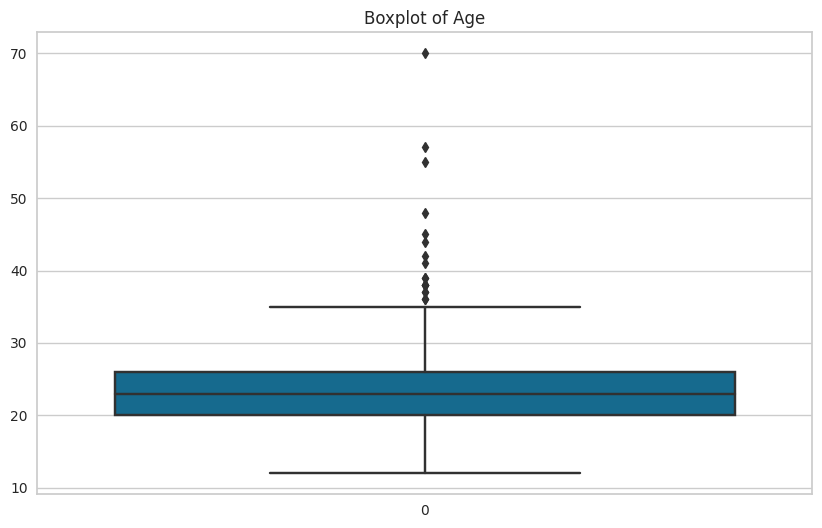

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for the age column
plt.figure(figsize=(10, 6))
sns.boxplot(data['age'])
plt.title('Boxplot of Age')
plt.show()


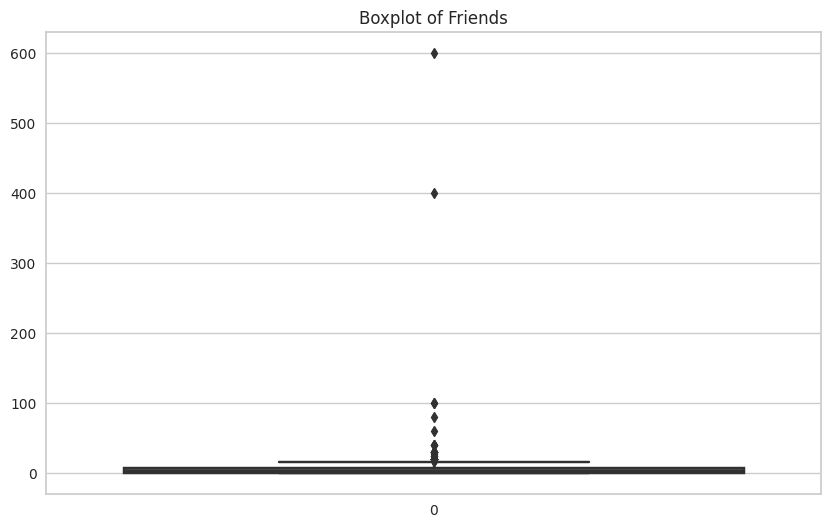

In [ ]:
# Boxplot for the friends column
plt.figure(figsize=(10, 6))
sns.boxplot(data['friends'])
plt.title('Boxplot of Friends')
plt.show()


Proposed Actions:

- For the age column: We could either keep the outliers, as age is a valid demographic factor, or we could cap the age at a certain threshold based on domain knowledge or statistical measures.
- For the friends column: A high number of friends might be valid for some individuals (e.g., popular social media influencers). However, for our analysis, we might consider capping the number of friends at a certain threshold or removing extreme outliers to avoid skewed results.

In [ ]:
# Calculate IQR for the age column
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

# Define bounds for outliers
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

# Filter out the outliers
data = data[(data['age'] >= lower_bound_age) & (data['age'] <= upper_bound_age)]

# Calculate IQR for the friends column
Q1_friends = data['friends'].quantile(0.25)
Q3_friends = data['friends'].quantile(0.75)
IQR_friends = Q3_friends - Q1_friends

# Define bounds for outliers
lower_bound_friends = Q1_friends - 1.5 * IQR_friends
upper_bound_friends = Q3_friends + 1.5 * IQR_friends

# Filter out the outliers
data = data[(data['friends'] >= lower_bound_friends) & (data['friends'] <= upper_bound_friends)]

# Display the shape of the data after removing outliers
data.shape


(416, 19)

After removing the extreme outliers from the age and friends columns, the dataset now contains 416 rows (down from the original 469).

### Data Visualization


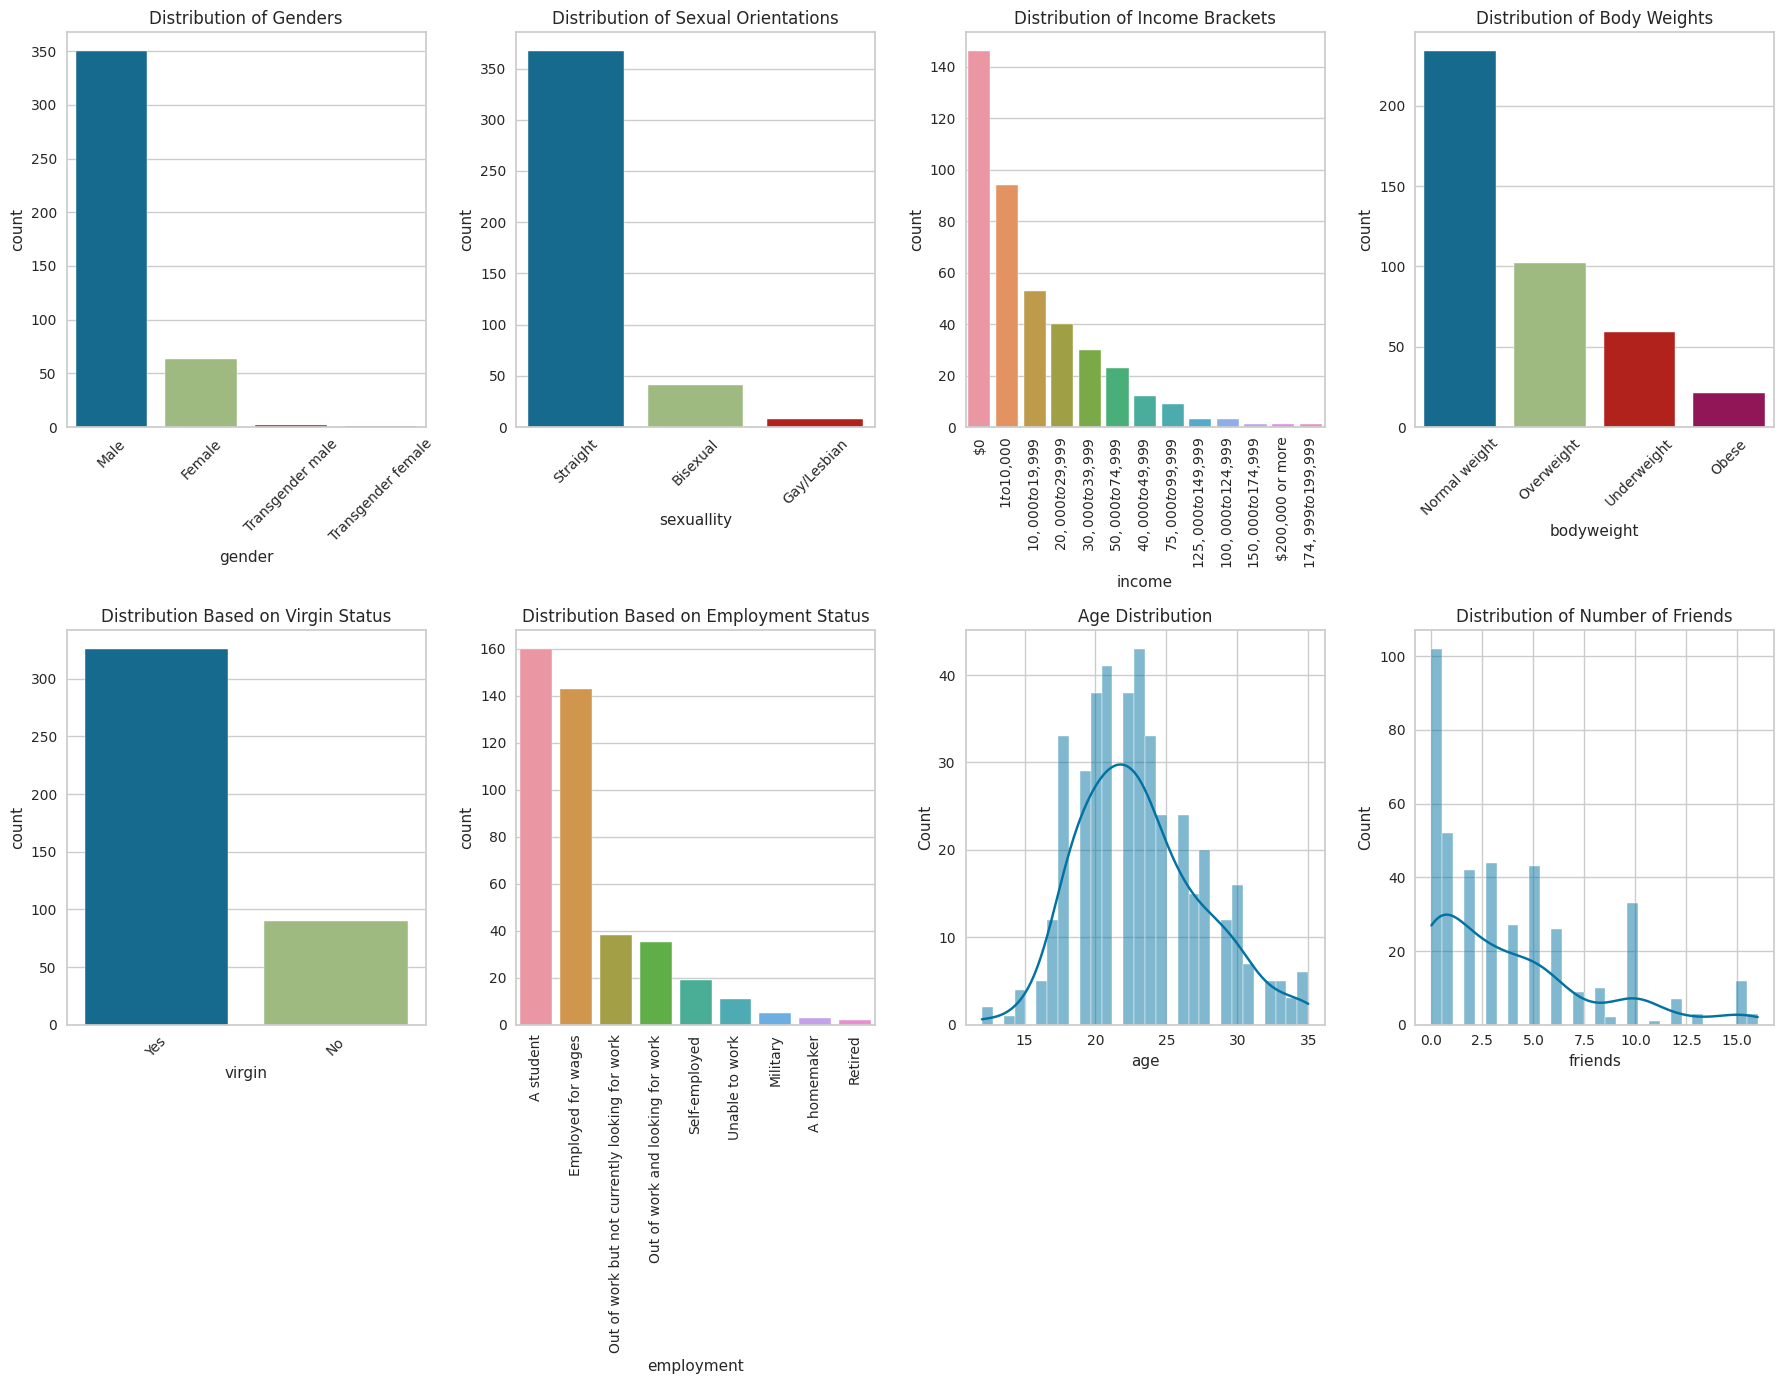

In [ ]:
# Set style for the visualizations
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(18, 14))

# Distribution of genders
plt.subplot(2, 4, 1)
sns.countplot(data=data, x='gender', order=data['gender'].value_counts().index)
plt.title('Distribution of Genders')
plt.xticks(rotation=45)

# Distribution of sexual orientations
plt.subplot(2, 4, 2)
sns.countplot(data=data, x='sexuallity', order=data['sexuallity'].value_counts().index)
plt.title('Distribution of Sexual Orientations')
plt.xticks(rotation=45)

# Distribution of income brackets
plt.subplot(2, 4, 3)
sns.countplot(data=data, x='income', order=data['income'].value_counts().index)
plt.title('Distribution of Income Brackets')
plt.xticks(rotation=90)

# Distribution of body weights
plt.subplot(2, 4, 4)
sns.countplot(data=data, x='bodyweight', order=data['bodyweight'].value_counts().index)
plt.title('Distribution of Body Weights')
plt.xticks(rotation=45)

# Distribution of respondents based on virgin status
plt.subplot(2, 4, 5)
sns.countplot(data=data, x='virgin', order=data['virgin'].value_counts().index)
plt.title('Distribution Based on Virgin Status')
plt.xticks(rotation=45)

# Distribution of respondents based on employment status
plt.subplot(2, 4, 6)
sns.countplot(data=data, x='employment', order=data['employment'].value_counts().index)
plt.title('Distribution Based on Employment Status')
plt.xticks(rotation=90)

# Age distribution
plt.subplot(2, 4, 7)
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')

# Distribution of number of friends
plt.subplot(2, 4, 8)
sns.histplot(data['friends'], bins=30, kde=True)
plt.title('Distribution of Number of Friends')

# Adjust layout
plt.tight_layout()
plt.show()


### Data Preprocessing

Let's start with encoding the categorical variables. For this, we'll use one-hot encoding for nominal categorical variables (those without a clear order) and label encoding for ordinal categorical variables (those with a clear order).

In [ ]:
# One-hot encoding for nominal categorical variables
nominal_columns = ['gender', 'sexuallity', 'race', 'virgin', 'prostitution_legal', 'pay_for_sex',
                   'social_fear', 'depressed', 'what_help_from_others', 'attempt_suicide',
                   'employment', 'job_title', 'improve_yourself_how']

data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True)

# Display the first few rows of the encoded data
data_encoded.head()


,time,age,income,bodyweight,friends,edu_level,gender_Male,gender_Transgender female,gender_Transgender male,sexuallity_Gay/Lesbian,...,"improve_yourself_how_Therapy, Other exercise, diets, change of wardrobe, medication, diet pills","improve_yourself_how_Therapy, Other exercise, join clubs/socual clubs/meet ups","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups, None, Volunteering, social activism, traveling","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups, medication",improve_yourself_how_Trying to accept my fate.,improve_yourself_how_join clubs/socual clubs/meet ups,"improve_yourself_how_join clubs/socual clubs/meet ups, Practice various skills, such as writing and piano.",improve_yourself_how_just b confident,"improve_yourself_how_work out at home, eat more"
0,5/17/2016 20:04:18,35,"$30,000 to $39,999",Normal weight,0.0,Associate degree,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5/17/2016 20:04:30,21,"$1 to $10,000",Underweight,0.0,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5/17/2016 20:04:58,22,$0,Overweight,10.0,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5/17/2016 20:08:01,19,"$1 to $10,000",Overweight,8.0,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5/17/2016 20:08:04,23,"$30,000 to $39,999",Overweight,10.0,"High school graduate, diploma or the equivalen...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Define the order for the income column
income_order = [
    '$0',
    '$1 to $10,000',
    '$10,000 to $19,999',
    '$20,000 to $29,999',
    '$30,000 to $39,999',
    '$40,000 to $49,999',
    '$50,000 to $59,999',
    '$60,000 to $69,999',
    '$70,000 to $79,999',
    '$80,000 to $89,999',
    '$90,000 to $99,999',
    '$100,000 to $124,999',
    '$125,000 to $149,999',
    '$150,000 or more'
]

# Map the order to the income column
data_encoded['income'] = data_encoded['income'].astype('category').cat.set_categories(income_order, ordered=True).cat.codes

# Display the first few rows of the updated data
data_encoded.head()


,time,age,income,bodyweight,friends,edu_level,gender_Male,gender_Transgender female,gender_Transgender male,sexuallity_Gay/Lesbian,...,"improve_yourself_how_Therapy, Other exercise, diets, change of wardrobe, medication, diet pills","improve_yourself_how_Therapy, Other exercise, join clubs/socual clubs/meet ups","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups, None, Volunteering, social activism, traveling","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups, medication",improve_yourself_how_Trying to accept my fate.,improve_yourself_how_join clubs/socual clubs/meet ups,"improve_yourself_how_join clubs/socual clubs/meet ups, Practice various skills, such as writing and piano.",improve_yourself_how_just b confident,"improve_yourself_how_work out at home, eat more"
0,5/17/2016 20:04:18,35,4,Normal weight,0.0,Associate degree,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5/17/2016 20:04:30,21,1,Underweight,0.0,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5/17/2016 20:04:58,22,0,Overweight,10.0,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5/17/2016 20:08:01,19,1,Overweight,8.0,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5/17/2016 20:08:04,23,4,Overweight,10.0,"High school graduate, diploma or the equivalen...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Standardize the age and friends columns
data_encoded[['age', 'friends']] = scaler.fit_transform(data_encoded[['age', 'friends']])

# Display the first few rows of the standardized data
data_encoded.head()


,time,age,income,bodyweight,friends,edu_level,gender_Male,gender_Transgender female,gender_Transgender male,sexuallity_Gay/Lesbian,...,"improve_yourself_how_Therapy, Other exercise, diets, change of wardrobe, medication, diet pills","improve_yourself_how_Therapy, Other exercise, join clubs/socual clubs/meet ups","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups, None, Volunteering, social activism, traveling","improve_yourself_how_Therapy, join clubs/socual clubs/meet ups, medication",improve_yourself_how_Trying to accept my fate.,improve_yourself_how_join clubs/socual clubs/meet ups,"improve_yourself_how_join clubs/socual clubs/meet ups, Practice various skills, such as writing and piano.",improve_yourself_how_just b confident,"improve_yourself_how_work out at home, eat more"
0,5/17/2016 20:04:18,2.706109,4,Normal weight,-0.969930,Associate degree,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5/17/2016 20:04:30,-0.494618,1,Underweight,-0.969930,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,5/17/2016 20:04:58,-0.265994,0,Overweight,1.550784,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5/17/2016 20:08:01,-0.951864,1,Overweight,1.046642,"Some college, no degree",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5/17/2016 20:08:04,-0.037371,4,Overweight,1.550784,"High school graduate, diploma or the equivalen...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


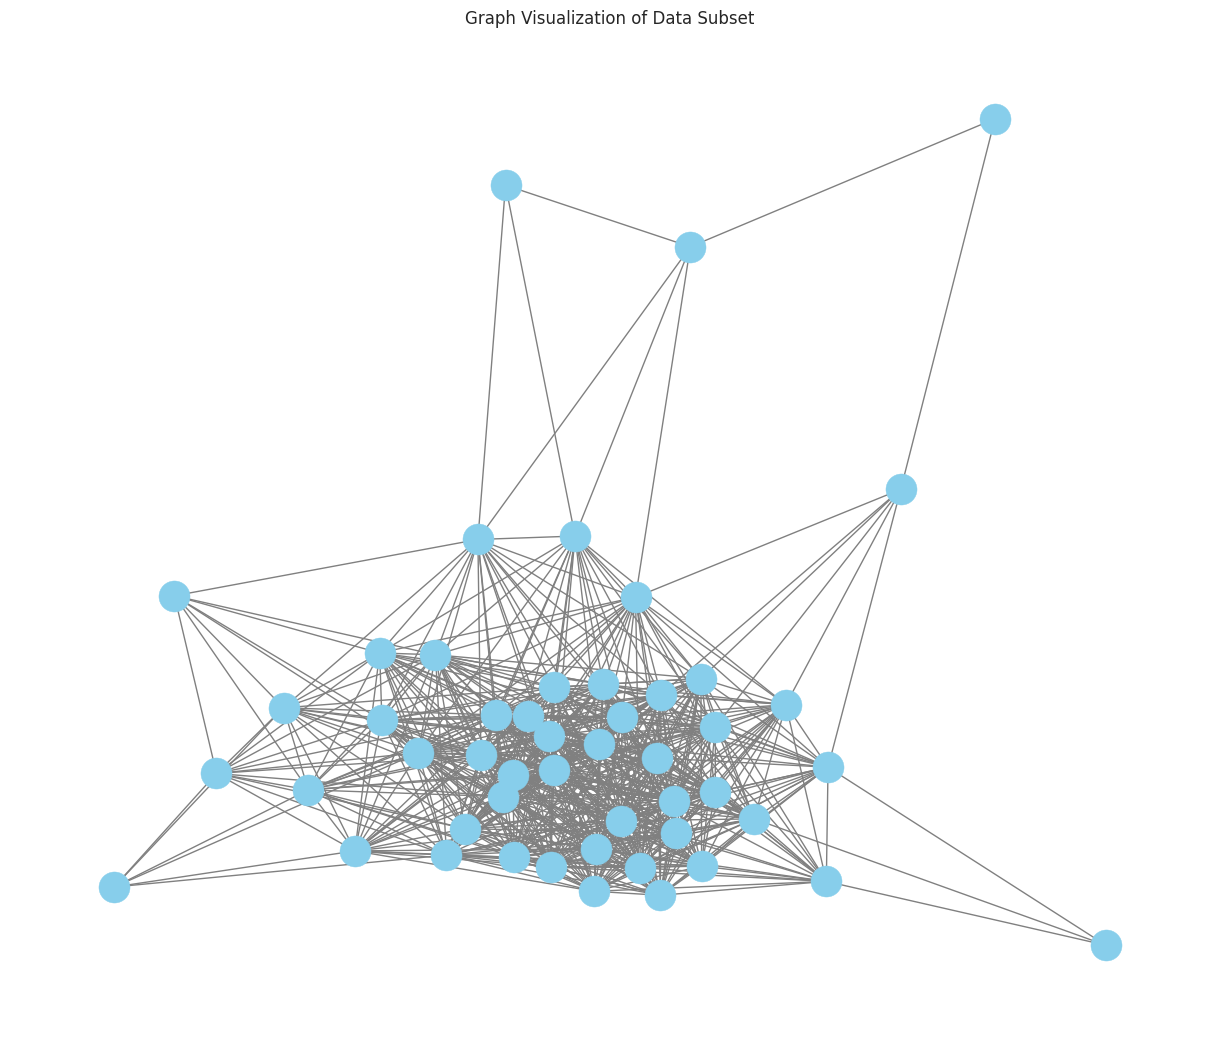

In [ ]:
import networkx as nx
from sklearn.metrics.pairwise import euclidean_distances

data_encoded = pd.get_dummies(data.drop(columns=['time']), drop_first=True)
data_clustering = data_encoded.copy()
# Take a subset of the data for graph visualization
data_subset = data_clustering.sample(n=50, random_state=42)

# Calculate pairwise distances
distances = euclidean_distances(data_subset)

# Create a graph
G = nx.Graph()

# Add nodes
for index, row in data_subset.iterrows():
    G.add_node(index)

# Add edges for distances below a threshold
threshold = distances.mean()
for i in range(distances.shape[0]):
    for j in range(i+1, distances.shape[1]):
        if distances[i, j] < threshold:
            G.add_edge(data_subset.index[i], data_subset.index[j])

# Plot the graph
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=False, node_size=500, node_color='skyblue', edge_color='gray')
plt.title("Graph Visualization of Data Subset")
plt.show()



### AutoML

In [ ]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(data, target = 'depressed')

,Description,Value
0,Session id,688
1,Target,depressed
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(416, 19)"
5,Transformed data shape,"(416, 74)"
6,Transformed train set shape,"(291, 74)"
7,Transformed test set shape,"(125, 74)"
8,Ordinal features,4
9,Numeric features,2


In [ ]:
# compare baseline models
top3 = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.6945,0.0000,0.9162,0.7210,0.8051,0.1328,0.1541,0.2610
lr,Logistic Regression,0.6944,0.6831,0.8610,0.7408,0.7951,0.2013,0.2222,0.3190
dt,Decision Tree Classifier,0.6907,0.5000,1.0000,0.6907,0.8170,0.0000,0.0000,0.2590
rf,Random Forest Classifier,0.6907,0.6926,1.0000,0.6907,0.8170,0.0000,0.0000,0.7270
ada,Ada Boost Classifier,0.6907,0.5000,1.0000,0.6907,0.8170,0.0000,0.0000,0.2630
gbc,Gradient Boosting Classifier,0.6907,0.5000,1.0000,0.6907,0.8170,0.0000,0.0000,0.3280
lda,Linear Discriminant Analysis,0.6907,0.5000,1.0000,0.6907,0.8170,0.0000,0.0000,0.4220
dummy,Dummy Classifier,0.6907,0.5000,1.0000,0.6907,0.8170,0.0000,0.0000,0.4890
nb,Naive Bayes,0.6874,0.5007,0.9902,0.6911,0.8139,0.0014,-0.0010,0.4330
et,Extra Trees Classifier,0.6872,0.6631,0.9850,0.6926,0.8131,0.0079,0.0008,0.5490


Processing:   0%|          | 0/67 [00:00<?, ?it/s]

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.5000,1.0000,0.7000,0.8235,0.0000,0.0000
1,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
2,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
3,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
4,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
5,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
6,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
7,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
8,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

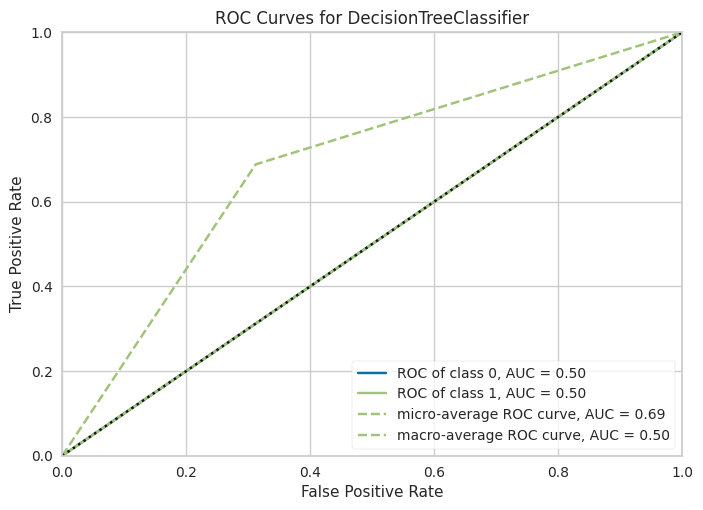

In [ ]:
plot_model(dt)

In [ ]:
# Ensemble the models using blend_models
ensembl = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7000,0.5000,1.0000,0.7000,0.8235,0.0000,0.0000
1,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
2,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
3,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
4,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
5,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
6,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
7,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000
8,0.6897,0.5000,1.0000,0.6897,0.8163,0.0000,0.0000


Processing:   0%|          | 0/6 [00:00<?, ?it/s]